In [1]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer


# Problem Statement

We want to find out the top features that lead to satisification



Context
- Based on the features of airline experience, it leads to how happy a customer will be. Using this dataset, we can build a model that predicts satisfication score, helping airlines improve on their services.
- This dataset contains an airline passenger satisfaction survey (see breakdown below) 


Observations of the dataset.

1. There is another index column (Unamed) - should be dropped
2. There are 3 fields for the customer's demographic (Gender, Customer  type, Age)
3. There are 16 fields for rating the airline (Inflight Wifi -> Arrival Delay in Minutes)
4. There is 3 fields that determine the demographic of the airline (Type of Travel, Class, Flight Distance)


In [2]:
airlines_data_dirty = pd.read_csv("airlines.csv")
airlines_data_dirty.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# Data Cleaning

# Drop the "Unnamed: 0" and "Type of Travel" columns
airlines_data_dirty.drop(columns=['Unnamed: 0'], inplace=True)
airlines_data_dirty.dropna(inplace=True)


# Filter the data to include only rows where the "Class" column is equal to 'Business'
# airlines_data = airlines_data_dirty[airlines_data_dirty['Class'] == 'Business']
airlines_data = airlines_data_dirty.copy()
airlines_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     103594 no

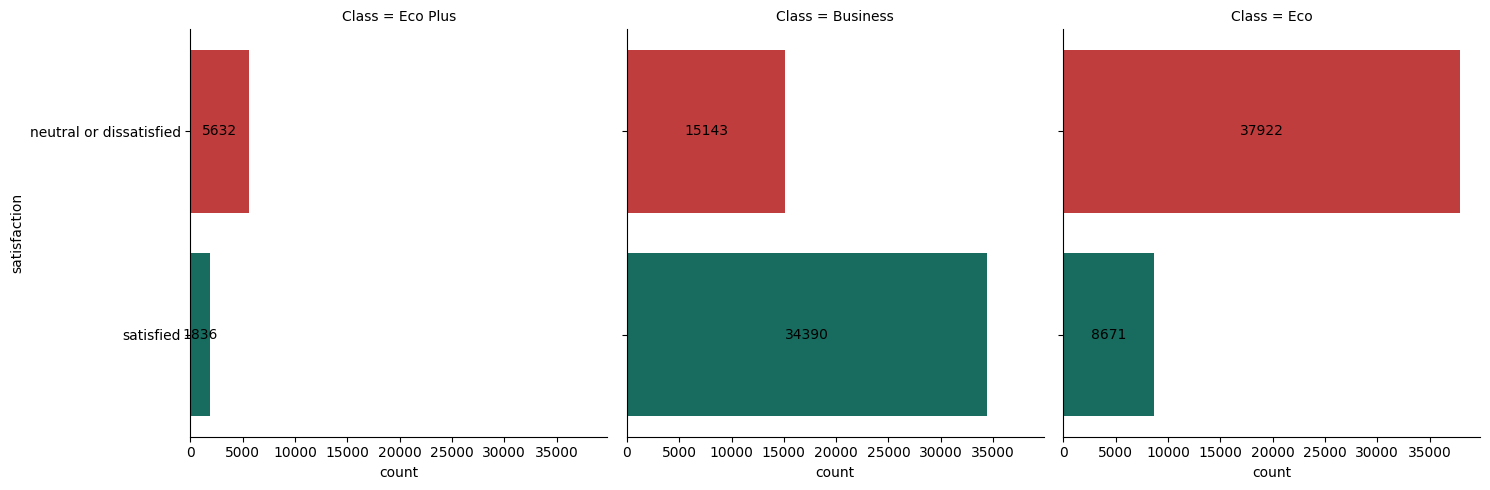

In [5]:
# Define colors for satisfied and dissatisfied customers
palette = {'satisfied': '#097969', 'neutral or dissatisfied': '#d62728'}

# Create a catplot with counts for each satisfaction category within each class
plot = sb.catplot(y='satisfaction', data=airlines_data, kind='count', col='Class', hue='satisfaction', palette=palette)

# Calculate counts and annotate the plots
for ax in plot.axes.flat:
    for p in ax.patches:
        ax.text(p.get_width() / 2, p.get_y() + p.get_height() / 2,
                '{:.0f}'.format(p.get_width()), ha='center', va='center', color='black')

# Show the plot
plt.show()


### Observation

From this graph, we observe that

Based on the class, it is obvious to see that for 
- **Eco Plus** there is more neutral or disatisified. (24.61% satisfied customers)
- **Business** there is more significant satisfied customers (69.43% satisfied customers)
- **Eco** there is more significantly neutral or disatisified customers (18.61% satisfied customers)

In [6]:
categorical_data = list(set(airlines_data.columns) - set(airlines_data._get_numeric_data().columns))
categorical_data

['Type of Travel', 'satisfaction', 'Class', 'Customer Type', 'Gender']

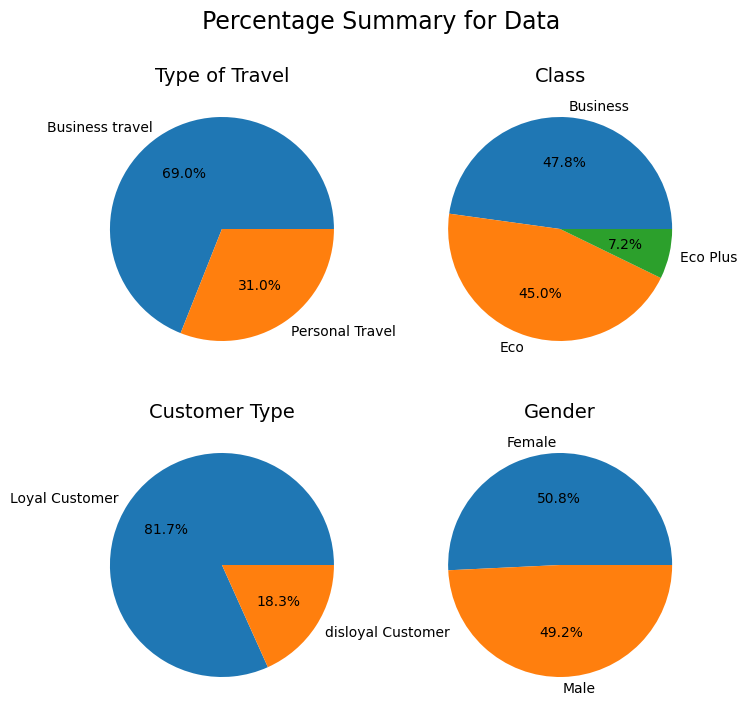

In [7]:
temp_categorical_data = categorical_data.copy()
temp_categorical_data.remove('satisfaction')

fig, ax = plt.subplots(2, 2, figsize=(8, 8)) 

for ind, i in enumerate(temp_categorical_data):
    d = airlines_data[i].value_counts()
    ax[ind // 2, ind % 2].pie(d, autopct='%1.1f%%', labels=d.index)
    ax[ind // 2, ind % 2].set_title(i, size=14)  



fig.suptitle("Percentage Summary for Data", size=17)
plt.show()

### Observation

- Most customers are returning passengers. - They probably experienced the airline before
- Most passengers were in `Business` class and the percentage of passengers in `Eco Plus` is relatively small.
- Gender seemed to be equal
- The most common `Type of Travel` is `Business`

In [8]:
airlines_data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Thoughts and Prayers

We want to find out the best features that correlates to the satisfication score, we will try to do this through `RandomForestClassification` as creating individual decision trees is _not-efficient_

In [9]:
airlines_numerical_rating_only = airlines_data.iloc[:, 4:23].select_dtypes(include=['int64', 'float64'])
airlines_numerical_rating_only.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [10]:
# Encode categorial data

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
airlines_data_copy = airlines_data.copy()

# Encode categorical variables
airlines_data_copy['Gender'] = label_encoder.fit_transform(airlines_data_copy['Gender'])
airlines_data_copy['Customer Type'] = label_encoder.fit_transform(airlines_data_copy['Customer Type'])
airlines_data_copy['Type of Travel'] = label_encoder.fit_transform(airlines_data_copy['Customer Type'])

### Random Forest

**Random Forest** is an ensemble learning method for classification, regression, and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, it predicts the average or mean of the outputs of the individual trees.

In [11]:
# !!!!!!!
# This generates features for all types of travel, the output is truncated

unique_classes = airlines_data_copy['Class'].unique()

# Loop over each unique class
for class_name in unique_classes:
    print(f"Class: {class_name}")
    # Filter the data for the current class
    class_data = airlines_data_copy[airlines_data_copy['Class'] == class_name]
    class_data = class_data.drop(columns=["Class"])
    
    X = class_data.drop(columns=['id', 'satisfaction'])
    y = class_data['satisfaction']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Handle missing values (NaN) in the features
    imputer = SimpleImputer(strategy='mean')  #  mean, median, or mode
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    # Train the RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train_imputed, y_train)
    
    # Get feature importances
    feature_importances = rf_classifier.feature_importances_
    
    # Create a DataFrame to display feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Display feature importances
    print(feature_importance_df)
    
    # Evaluate the model
    y_pred = rf_classifier.predict(X_test_imputed)
    print(classification_report(y_test, y_pred))

    print(f"===========================================================================")

Class: Eco Plus
                              Feature  Importance
5               Inflight wifi service    0.309383
10                    Online boarding    0.125243
7              Ease of Online booking    0.060326
12             Inflight entertainment    0.057989
2                                 Age    0.053290
4                     Flight Distance    0.049567
9                      Food and drink    0.032835
15                   Baggage handling    0.031608
6   Departure/Arrival time convenient    0.029872
17                   Inflight service    0.028880
14                   Leg room service    0.027192
20           Arrival Delay in Minutes    0.026632
16                    Checkin service    0.025503
18                        Cleanliness    0.025045
19         Departure Delay in Minutes    0.024045
11                       Seat comfort    0.023471
13                   On-board service    0.023015
8                       Gate location    0.021025
0                              Gen

### Observation

Based on the RandomForestClassifier, because the f1 score for all 3 forest are relatively high (>0.83), we can say with certainity that these fields are the most important

1. Online Boarding
2. Inflight Wifi Service


#### Understanding

The difference in F1 scores relates to the sample size given by the dataset. This is why for Eco, the f1-score is higher for neutral-dissatisified as there is significantly more dataset with that value.

## Conclusion 1

To our understanding, all features will lead to the satisfiaction score, the main differences is only between class types where they weigh features more than another. E.g. `Business` class weighs `Seat comfort` higher than `Eco` and `Eco Plus`.

Predicting satisfication score from the features will be _pointless_ as the satisfication score is basically based off the features. Therefore we decided to tackle **Problem 2**

## Problem #2

What features leads to arrival/departure delay timing (minutes)?

 This is important as airlines which optimise this can lead to a better satisifaction score.

In [12]:
airlines_data["Total Time Delay in Minutes"] = (airlines_data["Arrival Delay in Minutes"] + airlines_data["Departure Delay in Minutes"])


for col in [
    "Arrival Delay in Minutes",
    "Departure Delay in Minutes",
    "Total Time Delay in Minutes",
]:
    airlines_data[str(col + "_Category")] = pd.cut(
        airlines_data[col],
        bins=[0, 1, 10, 20, 60, airlines_data[col].max()],
        labels=["<1", "1-10", "10-20", "20-60", ">60"],
        include_lowest=True,
    )

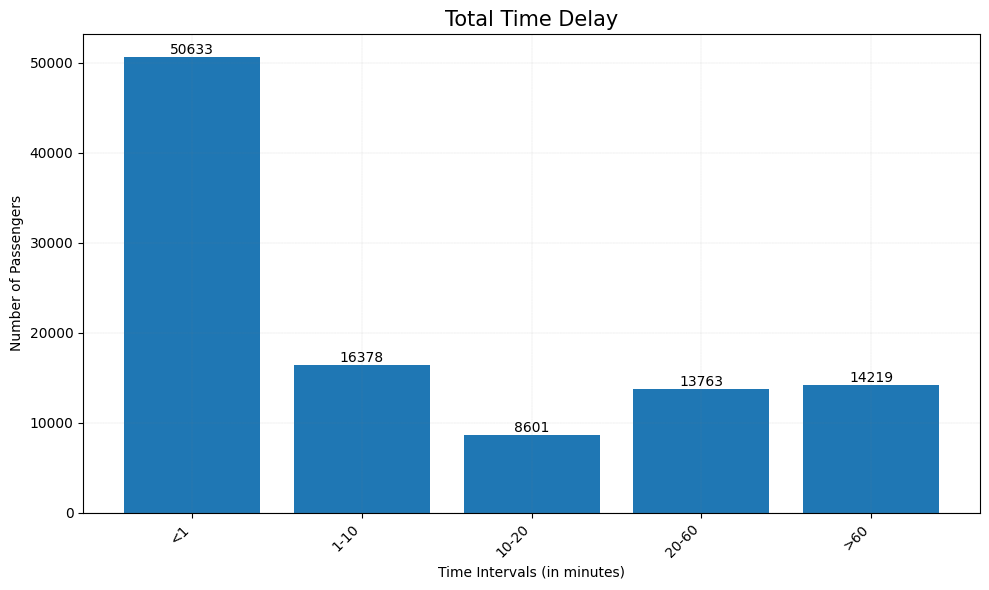

In [13]:
import matplotlib.pyplot as plt

# Count the values for each category and sort by index
toplot = airlines_data["Total Time Delay in Minutes_Category"].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(toplot.index, toplot, color="#1f77b4")

plt.xlabel("Time Intervals (in minutes)")
plt.ylabel("Number of Passengers")
plt.title("Total Time Delay", size=15)

plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", linewidth=0.1, color="gray")

# Add text annotations
for bar, value in zip(bars, toplot):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha="center", va="bottom")

plt.tight_layout()
plt.show()


### Observation

From this graph
- Majority of passengers have little (<1 min) to no delays
- The 8.3% of passengers experience 10-20 mins in total delay


In [14]:
airlines_data_cates = airlines_data.copy()
airlines_data_cates.drop(columns=['Customer Type', 'Age', 'Flight Distance', 'Type of Travel', 'Class', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction', 'Total Time Delay in Minutes', 'Arrival Delay in Minutes_Category', 'Departure Delay in Minutes_Category', 'Total Time Delay in Minutes_Category'], inplace=True)
rating_columns = airlines_data_cates.iloc[:, 2:].columns.tolist()
print(rating_columns)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [15]:
numerical_Ratings = airlines_data_cates.iloc[:, 2:].copy()
numerical_Ratings = numerical_Ratings.apply(lambda col: col.replace(0, col.mode()[0]))
numerical_Ratings.describe()


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103594.00000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,2.81941,3.264340,2.886519,2.977055,3.206180,3.343939,3.439803,3.358882,3.382725,3.369548,3.631687,3.304361,3.640877,3.286860
std,1.23882,1.360716,1.270664,1.277689,1.325724,1.256399,1.318854,1.332479,1.288160,1.296503,1.181051,1.265356,1.175441,1.311739
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.00000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
for col in rating_columns:
    airlines_data_cates[col] = pd.Categorical(airlines_data_cates[col])
    airlines_data_cates[col] = airlines_data_cates[col].replace(0,airlines_data_cates[col].mode()[0])
airlines_data_cates.info()


<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 103594 non-null  int64   
 1   Gender                             103594 non-null  object  
 2   Inflight wifi service              103594 non-null  category
 3   Departure/Arrival time convenient  103594 non-null  category
 4   Ease of Online booking             103594 non-null  category
 5   Gate location                      103594 non-null  category
 6   Food and drink                     103594 non-null  category
 7   Online boarding                    103594 non-null  category
 8   Seat comfort                       103594 non-null  category
 9   Inflight entertainment             103594 non-null  category
 10  On-board service                   103594 non-null  category
 11  Leg room service               

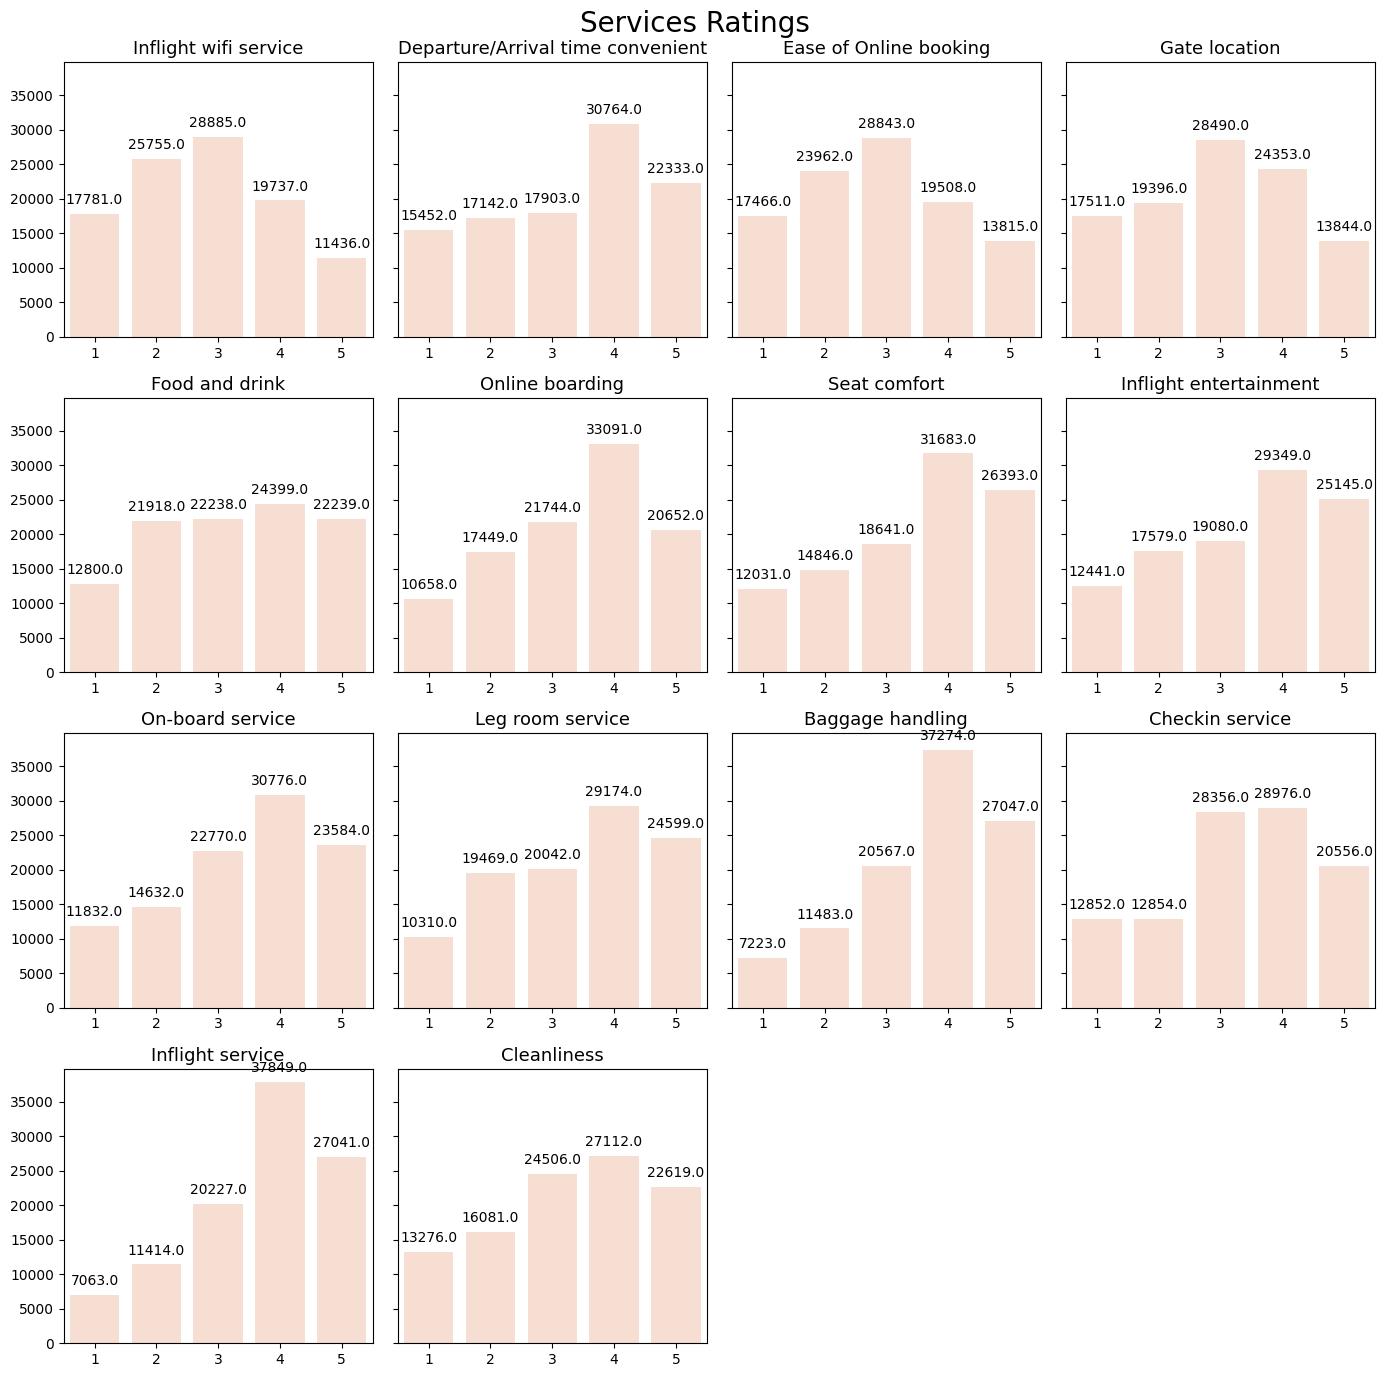

In [17]:
sb.set_palette("Reds")

fig, axes = plt.subplots(4, 4, figsize=(14, 14), sharey=True)

k = 0

for i in range(4):
    for j in range(4):
        ax = axes[i][j]
        col = rating_columns[k]
        sb.countplot(data=airlines_data_cates, x=col, ax=ax)
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_title(col, size=13)
        
        # Add text annotations
        for p in ax.patches:
            ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

        k += 1
        if k > 13:
            break


axes[3][2].axis("off")
axes[3][3].axis("off")

fig.suptitle("Services Ratings", size=20)
fig.tight_layout()
plt.show()

In [18]:
# Convert categorical columns to numerical values
numerical_data = airlines_data_cates.copy()
numerical_data.drop(columns=['Gender'], inplace=True)

for col in numerical_data.select_dtypes(include='category').columns:
    numerical_data[col] = numerical_data[col].astype('int64')

# Calculate the average for each column
column_averages = numerical_data.mean()

# Print the average for each column
print("Average rating for each column:")
for col, average in column_averages.items():
    if average > 3.5:
        print(f"Good: {col}: {average:.2f}")
    elif average < 3:
        print(f"Bad: {col}: {average:.2f}")
    else:
        print(f"Avg: {col}: {average:.2f}")

Average rating for each column:
Good: id: 64942.43
Bad: Inflight wifi service: 2.82
Avg: Departure/Arrival time convenient: 3.26
Bad: Ease of Online booking: 2.89
Bad: Gate location: 2.98
Avg: Food and drink: 3.21
Avg: Online boarding: 3.34
Avg: Seat comfort: 3.44
Avg: Inflight entertainment: 3.36
Avg: On-board service: 3.38
Avg: Leg room service: 3.37
Good: Baggage handling: 3.63
Avg: Checkin service: 3.30
Good: Inflight service: 3.64
Avg: Cleanliness: 3.29


### Observation

Context: Based on the rating average, 
- `>3.5` is Good
- `3-3.5` is Average
- `<3` is Bad

We decided on these parameters so that the data can be classified (the spread of ratings is quite tight, we feel that this is the best range to show differences in service)



We observe that the following have high ratings (Has a left tail)
- Baggage handling: 3.63
- Inflight service: 3.64

We observe that the following have med ratings (No obvious skew)
- Departure/Arrival time convenient: 3.26
- Food and drink: 3.21
- Online boarding: 3.34
- Seat comfort: 3.44
- Inflight entertainment: 3.36
- On-board service: 3.38
- Leg room service: 3.37
- Checkin service: 3.30
- Cleanliness: 3.29

We observe that the following have low ratings (Has a right tail)
- Inflight wifi service: 2.82
- Ease of Online booking: 2.89
- Gate location: 2.98

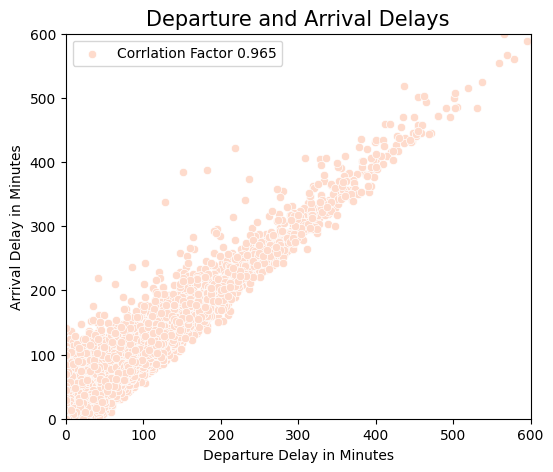

In [19]:
fig,ax = plt.subplots(figsize=(6,5))

sb.scatterplot(data=airlines_data,x='Departure Delay in Minutes',y='Arrival Delay in Minutes',ax=ax,
            label=f"Corrlation Factor {str(airlines_data['Departure Delay in Minutes'].corr(airlines_data['Arrival Delay in Minutes']))[:5]}")

ax.set_title("Departure and Arrival Delays",size=15)
ax.set_xlim(0, 600)
ax.set_ylim(0, 600)

plt.legend()
plt.show()

### Observation

There is a strong linear relationship between Departure and Arrival Delay Times


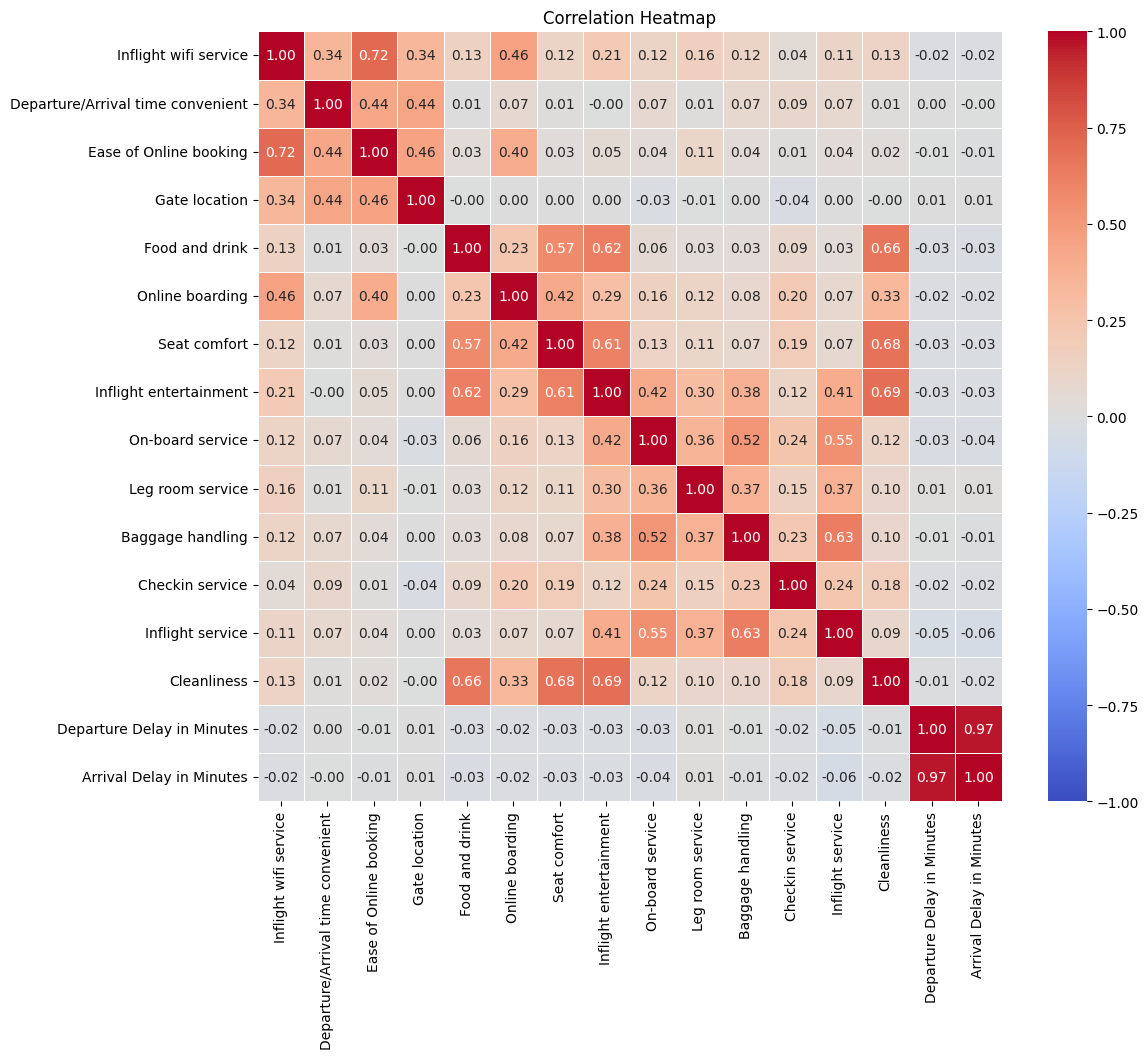

In [20]:
plt.figure(figsize=(12, 10))
# correlation_matrix = airlines_numerical_rating_only.corr()
airlines_data_corr = airlines_data.drop(columns=airlines_data.columns[0:7].append(airlines_data.columns[23:28]))
correlation_matrix = airlines_data_corr.corr()

sb.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Observation

Based on `Departure Delay` and `Arrival Delay`, there is no correlation to any feature. 

We decided to use RFE to rank all features towards `Total Time Delay in Minutes` to see if there are relationships.

### Linear Regression

**Linear Regression** is a foundational statistical method in machine learning, used primarily for predictive modeling. It attempts to model the relationship between a scalar dependent variable `y` and one or more explanatory variables (or independent variables) denoted `X`. The key principle behind linear regression is to fit a linear equation to observed data. The coefficients of the equation are derived by minimizing the difference between the predicted and actual data points.

In [21]:
from sklearn.feature_selection import RFE

# Initialize the linear regression model
model = LinearRegression()

# Initialize the RFE without specifying the number of features to select
rfe = RFE(model) 

# Fit RFE on all features
airlines_data_numeric = airlines_data.select_dtypes(exclude=['object', 'category'])

rfe.fit(airlines_data_numeric, airlines_data_numeric["Total Time Delay in Minutes"])

# Get ranking of features (1 is most important)
feature_ranking = rfe.ranking_

# Print feature ranking
for feature, rank in zip(X.columns, feature_ranking):
    print(f"{feature}: {rank}")


Gender: 11
Customer Type: 7
Age: 1
Type of Travel: 1
Flight Distance: 10
Inflight wifi service: 9
Departure/Arrival time convenient: 1
Ease of Online booking: 6
Gate location: 3
Food and drink: 1
Online boarding: 5
Seat comfort: 8
Inflight entertainment: 1
On-board service: 1
Leg room service: 4
Baggage handling: 1
Checkin service: 2
Inflight service: 1
Cleanliness: 1
Departure Delay in Minutes: 1


### Observation

From RFE, we take note of the following features
1. Flight Distance
2. Inflight wifi service
3. Gate location
4. Baggage handling
5. Inflight service

Based on the features, we will use them in Linear Regression to see if we can predict the time delays

In [22]:
# Select top-ranked features based on their rankings
top_features = [
    "Flight Distance",
    "Inflight wifi service",
    "Gate location",
    "Baggage handling",
    "Inflight service",
]

# Prepare the feature matrix X and target vector y
X = airlines_data[top_features]
y = airlines_data["Total Time Delay in Minutes"]

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the selected features
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 5769.679925953035
Coefficients: [ 1.25437099e-04 -1.07831905e+00  6.98883678e-01  3.17728365e+00
 -5.59439993e+00]
Intercept: 39.46935461848957


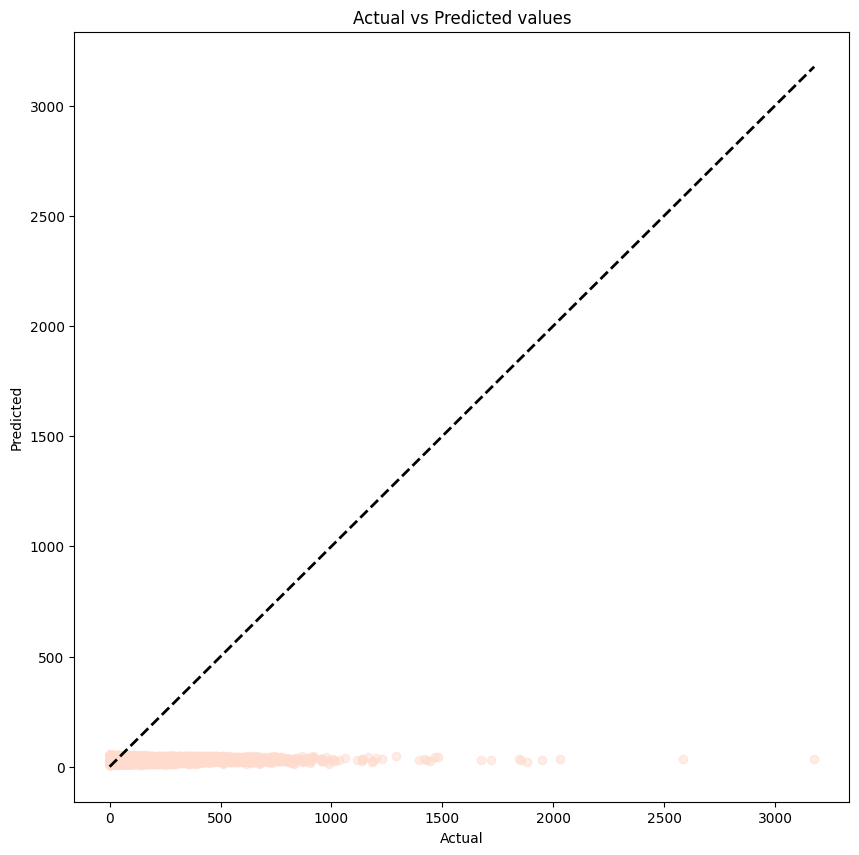

In [23]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 10))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted values")
plt.show()

### Observation

Based on this graph, it looks like linear regression doesnt help us predict, this could be due to the low correlation values. To confirm this, we will use a learning curve.

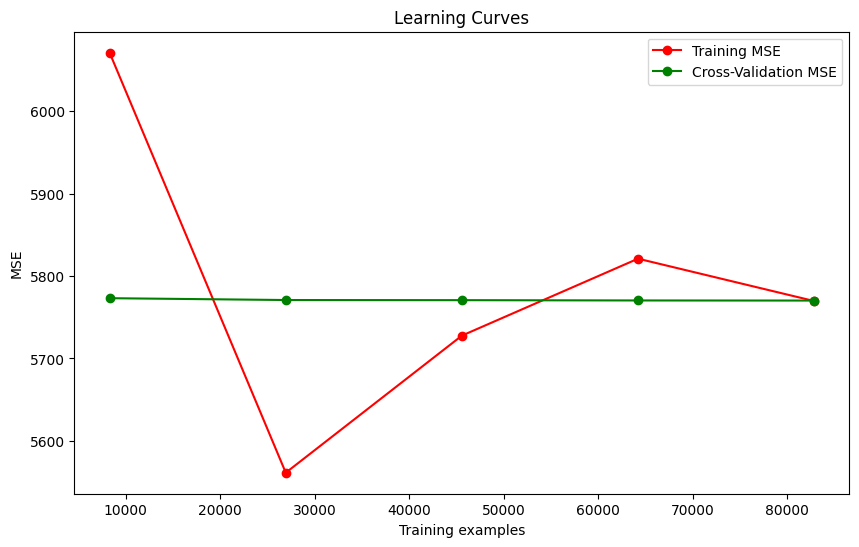

In [24]:
from sklearn.model_selection import learning_curve

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training MSE')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation MSE')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.title('Learning Curves')
plt.legend()
plt.show()


### Observations

- Based on the training MSE, it looks like at around 50000 examples is when our model starts to learn _properly_
- As the cross validation MSE line is flat, it suggest that adding more examples does not lead to improvement in performance
- The gap between CV MSE and Training MSE is overfitting to some extend - however we do not think its overfitting as the features we chosen are already through RFE.


### Conclusion

We take this as linear regression is not able to support our prediction. Together with possible high variance and high bias we decided to choose more complex models to predict.

In [25]:
# Reimport data set to get fresh data again

airlines_data_2 = pd.read_csv("airlines.csv")
airlines_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

For our first complex model, we decide to use `RandomForestRegressor`. This is because it offers are non-linearity as well as it handles automatic feature selection.

In [26]:
# Data preprocessing
columns_to_drop = [
    "Unnamed: 0",
    "Gender",
    "Age",
    "Customer Type",
    "Type of Travel",
    "Seat comfort",
    "Leg room service",
    "satisfaction",
]
data = airlines_data_2.drop(columns_to_drop, axis=1)

# Handling missing values in 'Arrival Delay' column by dropping rows with missing values
data = data.dropna(subset=["Arrival Delay in Minutes"])

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Splitting the data into features (X) and target variables (y)
X = data.drop(["Departure Delay in Minutes", "Arrival Delay in Minutes"], axis=1)
y_departure = data["Departure Delay in Minutes"]
y_arrival = data["Arrival Delay in Minutes"]

# Splitting the data into training and testing sets
X_train, X_test, y_departure_train, y_departure_test = train_test_split(
    X, y_departure, test_size=0.2, random_state=42
)
X_train, X_test, y_arrival_train, y_arrival_test = train_test_split(
    X, y_arrival, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest Regression model for departure delay
rf_departure = RandomForestRegressor()
rf_departure.fit(X_train, y_departure_train)

# Initialize and train the Random Forest Regression model for arrival delay
rf_arrival = RandomForestRegressor()
rf_arrival.fit(X_train, y_arrival_train)

# Model evaluation
# For departure delay
departure_predictions = rf_departure.predict(X_test)
departure_mae = mean_absolute_error(y_departure_test, departure_predictions)
departure_mse = mean_squared_error(y_departure_test, departure_predictions)
departure_rmse = mean_squared_error(
    y_departure_test, departure_predictions, squared=False
)

print("Departure Delay:")
print("Mean Absolute Error:", departure_mae)
print("Mean Squared Error:", departure_mse)
print("Root Mean Squared Error:", departure_rmse)

# For arrival delay
arrival_predictions = rf_arrival.predict(X_test)
arrival_mae = mean_absolute_error(y_arrival_test, arrival_predictions)
arrival_mse = mean_squared_error(y_arrival_test, arrival_predictions)
arrival_rmse = mean_squared_error(y_arrival_test, arrival_predictions, squared=False)

print("\nArrival Delay:")
print("Mean Absolute Error:", arrival_mae)
print("Mean Squared Error:", arrival_mse)
print("Root Mean Squared Error:", arrival_rmse)

# You can now use these trained models for prediction on new data

Departure Delay:
Mean Absolute Error: 19.942590858632176
Mean Squared Error: 1211.2435525266662
Root Mean Squared Error: 34.80292448238605

Arrival Delay:
Mean Absolute Error: 19.941351416574154
Mean Squared Error: 1186.884100188233
Root Mean Squared Error: 34.45118430748402


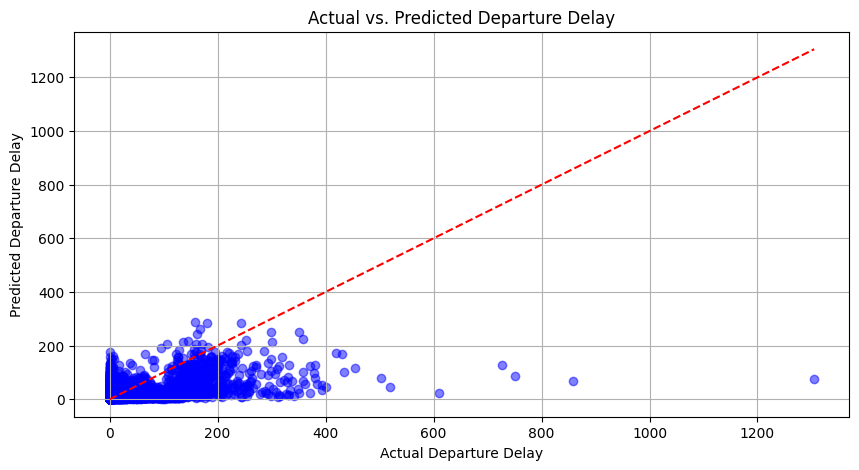

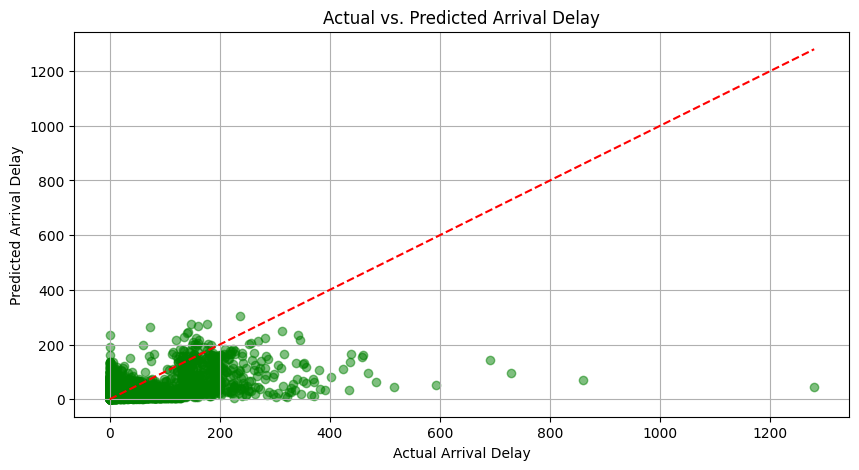

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(y_departure_test, departure_predictions, color='blue', alpha=0.5)
plt.plot([y_departure_test.min(), y_departure_test.max()], [y_departure_test.min(), y_departure_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Departure Delay')
plt.ylabel('Predicted Departure Delay')
plt.title('Actual vs. Predicted Departure Delay')
plt.grid(True)
plt.show()

# Plotting Arrival Delay
plt.figure(figsize=(10, 5))
plt.scatter(y_arrival_test, arrival_predictions, color='green', alpha=0.5)
plt.plot([y_arrival_test.min(), y_arrival_test.max()], [y_arrival_test.min(), y_arrival_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Actual vs. Predicted Arrival Delay')
plt.grid(True)
plt.show()

### Observation

From the graphs and MSE (>1000), it seems that the model is not able to predict accurately.

- For delays, there is a significant cluster of predictions that are predicted below the actual delay.
- There is large spread in predcitiosn for higher actual delays - which could mean overfitting


### Conclusion

We decide to use our second complex model - Gradient Boosting

### Gradient Boosting

**Gradient Boosting** is a powerful machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [28]:
# Data preprocessing
columns_to_drop = [
    "Unnamed: 0",
    "Gender",
    "Age",
    "Customer Type",
    "Type of Travel",
    "Seat comfort",
    "Leg room service",
    "satisfaction",
]
data = airlines_data_2.drop(columns_to_drop, axis=1)

# Handling missing values in 'Arrival Delay' column by dropping rows with missing values
data = data.dropna(subset=["Arrival Delay in Minutes"])

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split the data into features (X) and target variables (y) for departure delay and arrival delay
X_dep = data.drop('Departure Delay in Minutes', axis=1)
y_dep = data['Departure Delay in Minutes']

X_arr = data.drop('Arrival Delay in Minutes', axis=1)
y_arr = data['Arrival Delay in Minutes']

# Split the data into training and testing sets
X_dep_train, X_dep_test, y_dep_train, y_dep_test = train_test_split(X_dep, y_dep, test_size=0.2, random_state=42)
X_arr_train, X_arr_test, y_arr_train, y_arr_test = train_test_split(X_arr, y_arr, test_size=0.2, random_state=42)

# Initialize and train gradient boosting models for both departure delay and arrival delay
gb_dep = GradientBoostingRegressor()
gb_arr = GradientBoostingRegressor()

gb_dep.fit(X_dep_train, y_dep_train)
gb_arr.fit(X_arr_train, y_arr_train)

# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)

print("Departure Delay Metrics:")
evaluate_model(gb_dep, X_dep_test, y_dep_test)

print("\nArrival Delay Metrics:")
evaluate_model(gb_arr, X_arr_test, y_arr_test)

Departure Delay Metrics:
Mean Absolute Error: 5.340298599686985
Mean Squared Error: 94.91044028111082
R^2 Score: 0.9361016379926337

Arrival Delay Metrics:
Mean Absolute Error: 5.476752055718463
Mean Squared Error: 97.62744914067626
R^2 Score: 0.9349168809517694


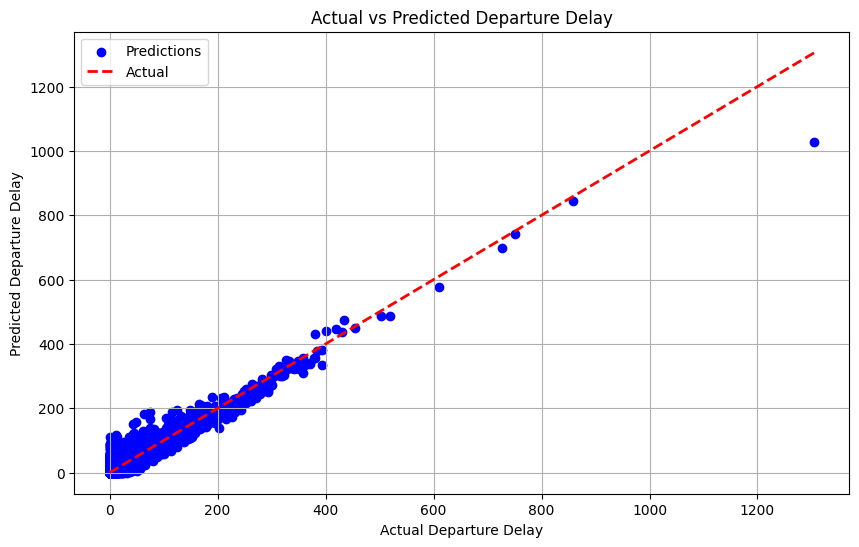

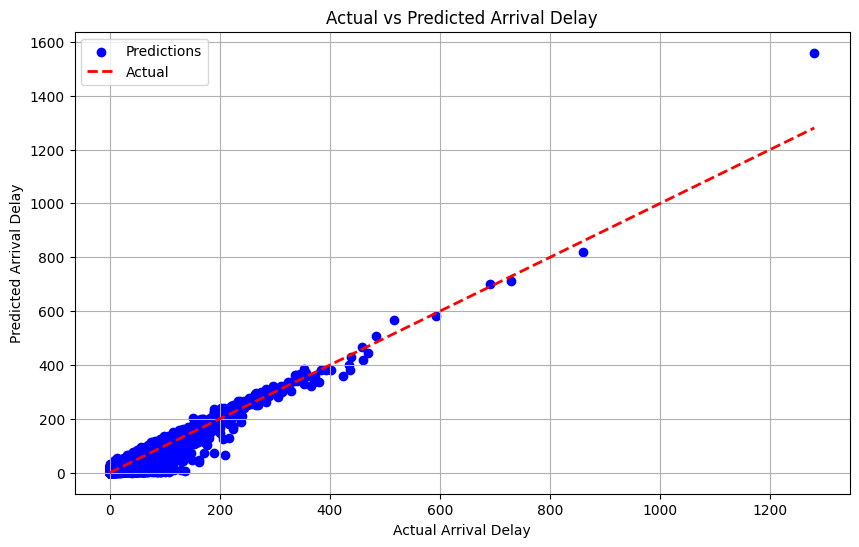

In [29]:
dep_delay_pred = gb_dep.predict(X_dep_test)

# Predictions for arrival delay
arr_delay_pred = gb_arr.predict(X_arr_test)

# Plotting actual vs predicted departure delay
plt.figure(figsize=(10, 6))
plt.scatter(y_dep_test, dep_delay_pred, color='blue', label='Predictions')
plt.plot([min(y_dep_test), max(y_dep_test)], [min(y_dep_test), max(y_dep_test)], '--', lw=2, color='red', label='Actual')
plt.title('Actual vs Predicted Departure Delay')
plt.xlabel('Actual Departure Delay')
plt.ylabel('Predicted Departure Delay')
plt.legend()
plt.grid(True)
plt.show()

# Plotting actual vs predicted arrival delay
plt.figure(figsize=(10, 6))
plt.scatter(y_arr_test, arr_delay_pred, color='blue', label='Predictions')
plt.plot([min(y_arr_test), max(y_arr_test)], [min(y_arr_test), max(y_arr_test)], '--', lw=2, color='red', label='Actual')
plt.title('Actual vs Predicted Arrival Delay')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.legend()
plt.grid(True)
plt.show()

### Observation

The MSE and graph both point towards accurate prediction for delays, the points are clustered against the actual delays.

- The models are quite accurate for small to moderate delays.
- The prediction accuracy decreases as the delay duration increases, particularly for high delays. (could be due to outliers)


In [30]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Initialize lists to store results
mae_scores = []
mse_scores = []
r2_scores = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_dep_train, y_dep_train)
    y_pred = model.predict(X_dep_test)
    
    mae = mean_absolute_error(y_dep_test, y_pred)
    mse = mean_squared_error(y_dep_test, y_pred)
    r2 = r2_score(y_dep_test, y_pred)
    
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Create DataFrame to store results
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Mean Absolute Error': mae_scores,
    'Mean Squared Error': mse_scores,
    'R-squared': r2_scores
})


In [31]:
results_df

,Model,Mean Absolute Error,Mean Squared Error,R-squared
0,Linear Regression,5.277627,97.315934,0.934482
1,Random Forest,5.584896,100.513330,0.932329
2,Gradient Boosting,5.340389,94.960994,0.936068


# Conclusion

Based on our interpretation of the graphs and the given metrics, we conclude that using Gradient Boosting provides the best prediction in arrival and departure delay.
